# 2. Численное дифференцирование

Написать функции для вычисления на равномерной сетке $ [ a, b ] $:

1. первой производной, используя правую и центральную разности:

  > правая: $ f'(x) \approx \dfrac{f(x + h) - f(x)}{h} =: f'_{h}(x) $
  >
  > центральная: $ f'(x) \approx \dfrac{f(x + h) - f(x - h)}{2h} =: f'_{h}(x) $

* реализовать это в виде функций `diff_1_right(N)` и `diff_1_central(N)`, возвращающих массив значений производной на равномерной сетке с шагом $ h = \frac{b - a}{N} $.
* Для функций `diff_1_right(N)` и `diff_1_central(N)` на одном графике построить зависимости $ MSE $ vs $ h $, где $ MSE $ --- среднеквадратичное отклонение производной, вычисленной численно, от производной, рассчитанной аналитически (вручную, в maple, в онлайн решателях):

  > $$ MSE(h) = \frac{1}{N} \sum_{i} (f'_{h}(x_{i}) - f'(x_{i}))^{2} $$

2. Реализовать функции `diff_2_ord2(N)` и `diff_2_ord4(N)` для численного дифференцирования методом центральных разностей со вторым и четвертым порядком точности на равномерной сетке с шагом $ h = \frac{b - a}{N} $.
  > формулы: [Ссылка, формулы (1) и (2)](http://www.machinelearning.ru/wiki/index.php?title=%D0%92%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B9_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D0%BE%D0%B9_%D0%BF%D0%BE_%D0%BE%D0%B4%D0%BD%D0%BE%D0%B9_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9)

  Аналогично заданию 1 построить зависимость $ MSE $ vs $ h $ для обоих функций

Имейте в виду, что на сетке с равномерным шагом $ f(x_{i} + h) = f(x_{i+1}) $.

Учтите, что у крайних точек слева или справа нет соседей. Для крайних точек вычислять производную не нужно.


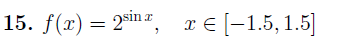

Введите N = 50


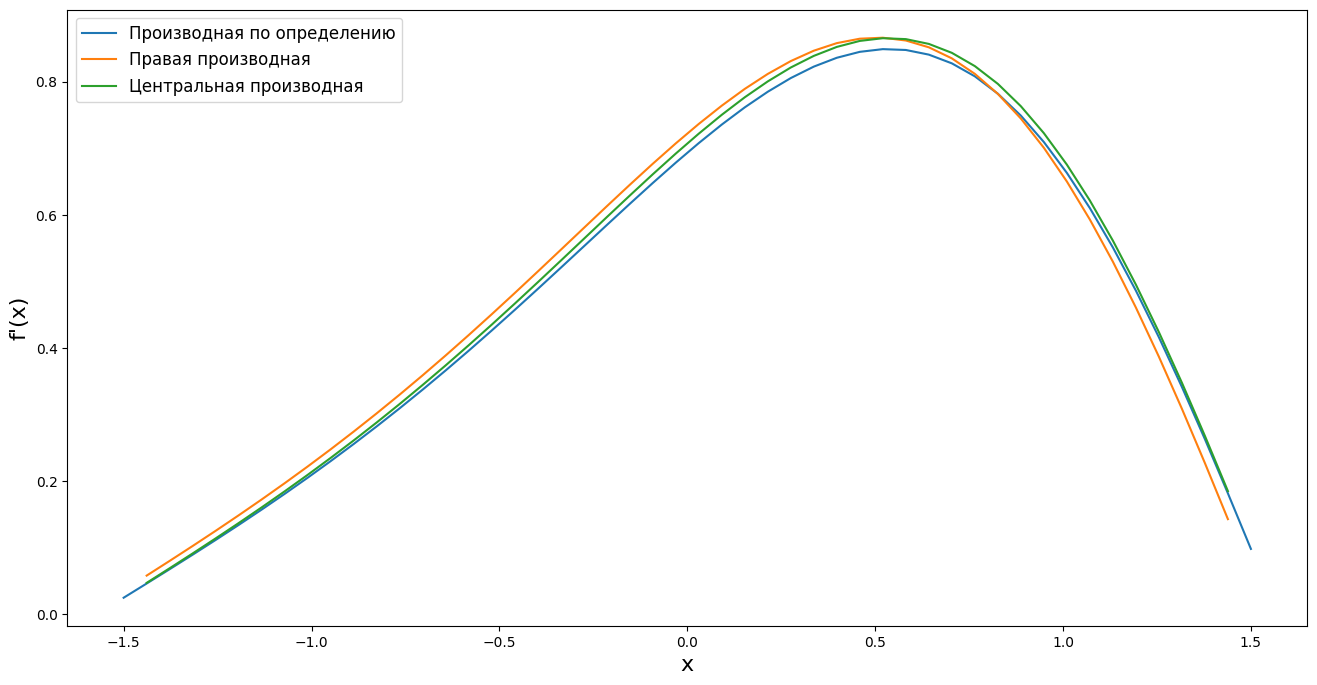

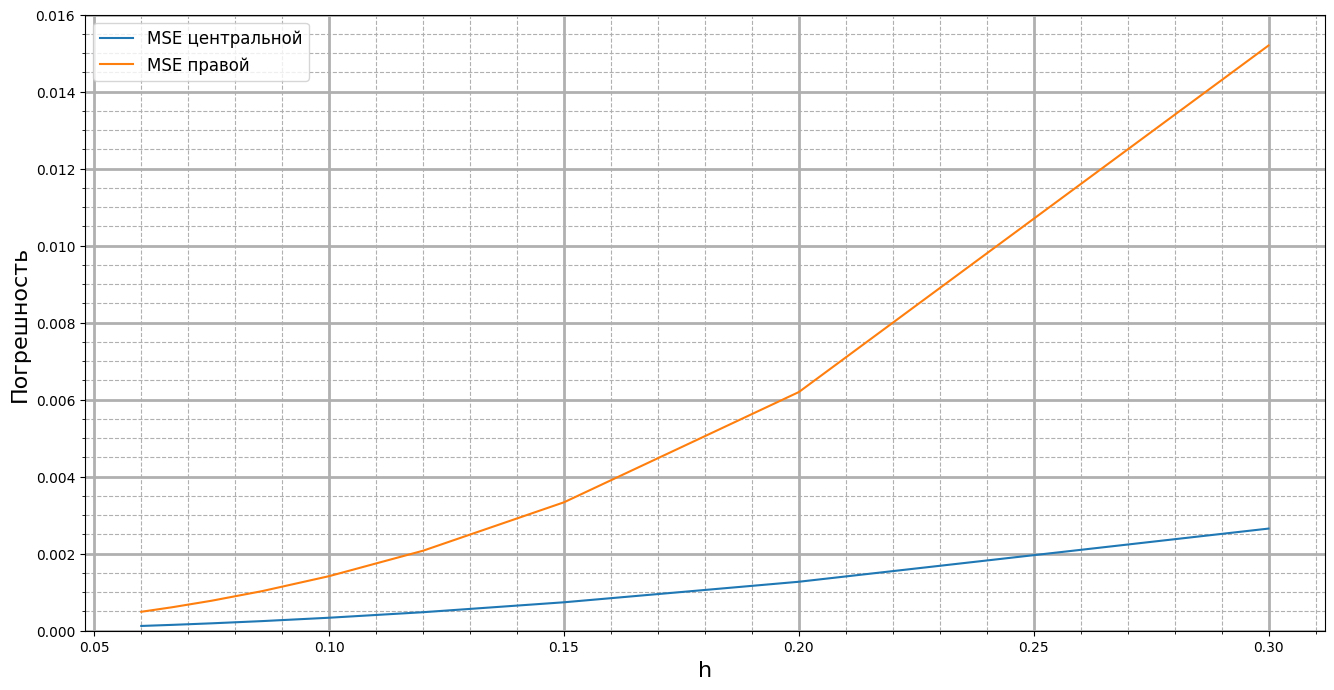

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diff_1_right(N, y_i):
  f = []
  for i in range(1, N-1) :
    f.append(N*(y_i[i+1]-y_i[i])/(b-a))
  return f

def diff_1_central(N, y_i):
  f = []
  for i in range(1, N-1) :
    f.append(N*(y_i[i+1]-y_i[i-1])/(2*(b-a)))
  return f

def MSEc(N, f_i):
  d = 0
  f = diff_1_central(N, y_i)
  for i in range(1, N-1) :
    d += (f_i[i] - f[i-1])**2
  return d/(N-2)

def MSEr(N, f_i):
    d = 0
    f = diff_1_right(N, y_i)
    for i in range(1, N-1) :
      d += (f_i[i] - f[i-1])**2
    return d/(N-2)

N = int(input('Введите N = '))
a = -1.5
b = 1.5
x_i = np.linspace(a, b, N)
y_i = 2**np.sin(x_i)
f_i = np.log(2)*(2**np.sin(x_i))*np.cos(x_i)

plt.rcParams ['figure.figsize'] = [16, 8]

# plt.plot(x_i, y_i)
plt.plot(x_i, f_i, label='Производная по определению')
plt.plot(x_i[1:N-1], diff_1_right(N, y_i), label='Правая производная')
plt.plot(x_i[1:N-1], diff_1_central(N, y_i), label='Центральная производная')
plt.xlabel('x', fontsize=16)
plt.ylabel("f'(x)", fontsize=16)
plt.legend(loc='upper left', fontsize='large')
plt.show()

variance_cent = []
variance_right = []
h = []
for N in range(10, 51, 5):
    x_i = np.linspace(a, b, N)
    y_i = 2**np.sin(x_i)
    f_i = np.log(2)*(2**np.sin(x_i))*np.cos(x_i)
    variance_cent.append(MSEc(N, f_i))
    variance_right.append(MSEr(N, f_i))
    h.append((b-a)/N)

plt.plot(h, variance_cent, label='MSE центральной')
plt.plot(h, variance_right, label='MSE правой')
plt.xlabel('h', fontsize=16)
plt.ylabel("Погрешность", fontsize=16)
plt.ylim((0,0.016))
plt.minorticks_on()
plt.grid(visible = True, which='minor', linestyle='--')
plt.grid(visible = True, which='major', linewidth = 2)
plt.legend(loc='upper left', fontsize='large')
plt.show()

# plt.minorticks_on()
# plt.plot(x, N, 'r.', markersize=16, linewidth = 10, label='Погрешность правой')
# plt.grid(visible = True, which='minor', linestyle='--')
# plt.grid(visible = True, which='major', linewidth = 2)
# plt.errorbar(x, N, xerr=1)
# plt.xlim((5,45))
# plt.xticks(np.arange(5,46,5))
# plt.ylim((0,700))
# plt.legend(loc='upper left', fontsize='large')
# plt.show()

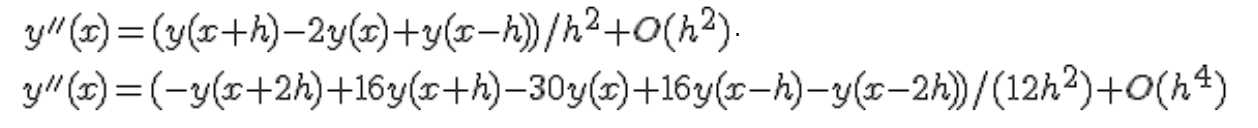

Введите N = 50


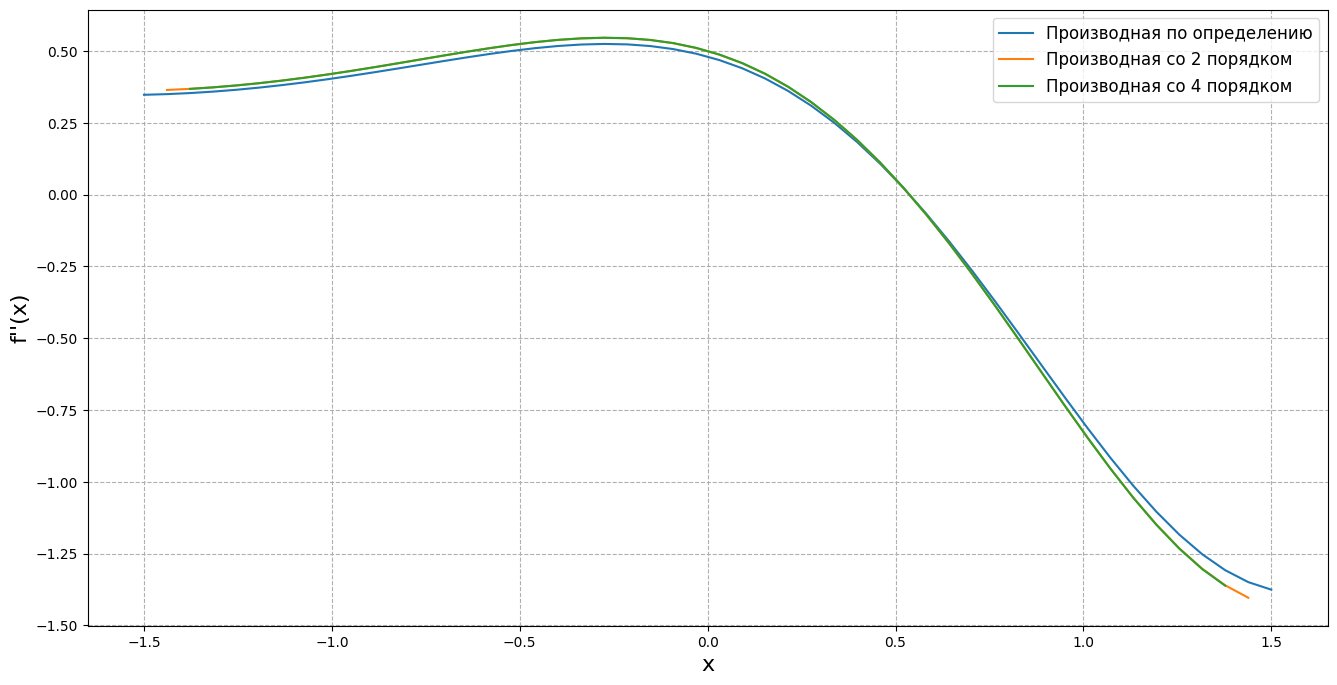

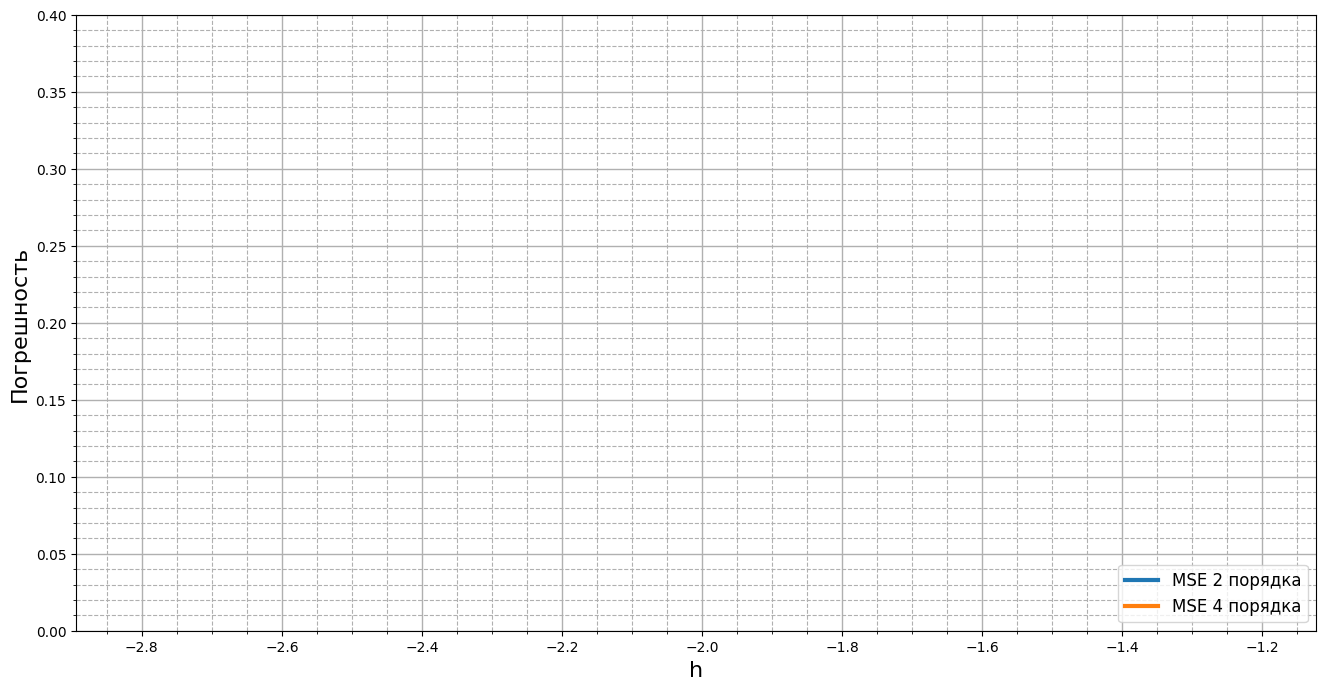

1.6093595696931073
1.3195336930938866


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

def diff_2_ord2(N, f_i):
    f = []
    error = 0
    m = 0
    for i in range(1, N-1):
        m = N*N*(y_i[i+1]-2*y_i[i]+y_i[i-1])/((b-a)**2)
        f.append(m)
        error += (f_i[i] - f[i-1])**2
    error /= (N-2)
    f.append(error)
    return f

def diff_2_ord4(N, f_i):
    f = []
    error = 0
    m = 0
    for i in range(2, N-2) :
        m = N*N*(-y_i[i+2]+16*y_i[i+1]-30*y_i[i]+16*y_i[i-1]-y_i[i-2])/(12*(b-a)**2)
        f.append(m)
        error += (f_i[i] - f[i-2])**2
    error /= (N-4)
    f.append(error)
    return f


N = int(input('Введите N = '))
a = -1.5
b = 1.5
x_i = np.linspace(a, b, N)
y_i = 2**np.sin(x_i)
f_i = log(2)**2 * 2**np.sin(x_i) * np.cos(x_i)**2 - log(2) * 2**np.sin(x_i) * np.sin(x_i)

plt.rcParams ['figure.figsize'] = [16, 8]

plt.plot(x_i, f_i, label='Производная по определению')
plt.plot(x_i[1:N-1], diff_2_ord2(N, f_i)[:-1], label='Производная со 2 порядком')
plt.plot(x_i[2:N-2], diff_2_ord4(N, f_i)[:-1], label='Производная со 4 порядком')
plt.grid(visible = True, linestyle='--')
plt.xlabel('x', fontsize=16)
plt.ylabel("f''(x)", fontsize=16)
plt.legend(loc='upper right', fontsize='large')
plt.show()


error_ord2 = []
error_ord4 = []
h = []
for N in range(10, 51, 1):
    x_i = np.linspace(a, b, N)
    f_i = log(2)**2 * 2**np.sin(x_i) * np.cos(x_i)**2 - log(2) * 2**np.sin(x_i) * np.sin(x_i)
    error_ord2.append(diff_2_ord2(N, f_i)[-1])
    error_ord4.append(diff_2_ord4(N, f_i)[-1])
    h.append((b-a)/N)

plt.plot(np.log(h), np.log(error_ord2), linewidth = 3, label='MSE 2 порядка')
plt.plot(np.log(h), np.log(error_ord4), linewidth = 3, label='MSE 4 порядка')
plt.xlabel('h', fontsize=16)
plt.ylabel("Погрешность", fontsize=16)
plt.ylim((0,0.4))
plt.minorticks_on()
plt.grid(visible = True, which='minor', linestyle='--')
plt.grid(visible = True, which='major', linewidth = 1)
plt.legend(loc='lower right', fontsize='large')
plt.show()

print(np.polyfit(np.log(h), np.log(error_ord2), 1)[0])
print(np.polyfit(np.log(h), np.log(error_ord4), 1)[0])
